In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {'Marketing Spend':[23,26,30,34,43,48],
       'Sales':[651,762, 856, 1063, 1190,1298]}
data = pd.DataFrame(data, dtype=np.int)
data

,Marketing Spend,Sales
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


<AxesSubplot:xlabel='Marketing Spend', ylabel='Sales'>

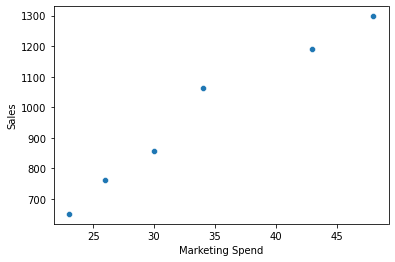

In [3]:
# ploting the data
sns.scatterplot(data=data, x='Marketing Spend',y='Sales')


In [4]:
# from the above graph we can see that the relation between marketing and sales are pretty linear.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Marketing Spend  6 non-null      int32
 1   Sales            6 non-null      int32
dtypes: int32(2)
memory usage: 176.0 bytes


In [5]:
#scale the data
scaler = MinMaxScaler()
num_vars = ['Marketing Spend','Sales']
data[num_vars]= scaler.fit_transform(data[num_vars])


In [6]:
data

,Marketing Spend,Sales
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


<AxesSubplot:xlabel='Marketing Spend', ylabel='Sales'>

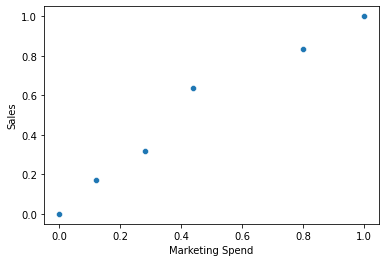

In [7]:
sns.scatterplot(data=data, x='Marketing Spend',y='Sales')

In [8]:
# both of the axes range between 0 and 1 

# Builing the linear regression model

In [9]:
# read the data
X = data['Marketing Spend'].values.reshape(-1,1)
y = data['Sales']

In [10]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
y_pred= reg.predict(X)
y_pred

array([0.05907859, 0.17743302, 0.33523892, 0.49304482, 0.8481081 ,
       1.04536548])

In [12]:
r2_score(y,y_pred)

0.9652190930694494

In [13]:
#marketing spends accoundts for 96.5% of the variation present in the sales.

# RSS = MSE * TOTAL NUMBER OF DATAPOINTS

rss = np.sum(np.square(y-y_pred))
print(rss)

mse = mean_squared_error(y,y_pred)
print(mse)

rmse = mse**0.5
print(rmse)

0.026808307381756883
0.004468051230292814
0.06684348308019873


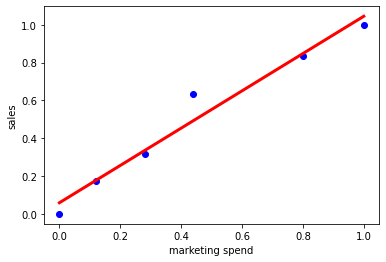

In [14]:
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red',linewidth=3)
plt.xlabel("marketing spend")
plt.ylabel("sales")
plt.show()

In [15]:
# TO FIT THE MODEL BETTER WE CAN USE HIGH DEGREE POLYNOMIAL REGRESSIONS

X = data['Marketing Spend'].values.reshape(-1,1)

poly = PolynomialFeatures(3)
# using this function and passing 3 =>this will tell to generate the features or predictors with the number mentioned.
Y = poly.fit_transform(X)
print(Y)

#X^0 , X^1, X^2, X^3

[[1.       0.       0.       0.      ]
 [1.       0.12     0.0144   0.001728]
 [1.       0.28     0.0784   0.021952]
 [1.       0.44     0.1936   0.085184]
 [1.       0.8      0.64     0.512   ]
 [1.       1.       1.       1.      ]]


In [16]:
#now we will build the polynomial regression model with degree 5
degree = 5 # random degree after trial n error
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X)
print(X_poly5)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.20000000e-01 1.44000000e-02 1.72800000e-03
  2.07360000e-04 2.48832000e-05]
 [1.00000000e+00 2.80000000e-01 7.84000000e-02 2.19520000e-02
  6.14656000e-03 1.72103680e-03]
 [1.00000000e+00 4.40000000e-01 1.93600000e-01 8.51840000e-02
  3.74809600e-02 1.64916224e-02]
 [1.00000000e+00 8.00000000e-01 6.40000000e-01 5.12000000e-01
  4.09600000e-01 3.27680000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [17]:
# now using the above model as predictors we build LR model

linreg5 = LinearRegression()
linreg5.fit(X_poly5,y)

LinearRegression()

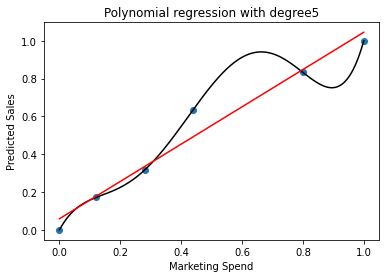

In [18]:
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq, linreg5.predict(polyreg5.fit_transform(X_seq)),color='black')
plt.plot(X_seq,reg.predict(X_seq),color = 'red')

plt.title("Polynomial regression with degree" +str(degree))
plt.xlabel("Marketing Spend")
plt.ylabel("Predicted Sales")
plt.show()

In [19]:
#blue dots are data points, and black line is what we obtained using polynomial regression.

y_pred5 = linreg5.predict(polyreg5.fit_transform(X))
print(r2_score(y,y_pred5))

1.0


In [20]:
rss = np.sum(np.square(y - y_pred5))
print(rss)

mse = mean_squared_error(y, y_pred5)
print(mse)

rmse = mse**0.5
print(rmse)

1.6288128800067282e-28
2.714688133344547e-29
5.2102669157582964e-15


In [21]:
# r2 score is 1 which implies that data is overfitting
# overfitting results in low bias and high variance.
# Ths high variance might result in model which doesnt perform well with the test data.

In [22]:
# Hence, we can now use regularization method - Ridge regression.
# ths helps to reduce the model complexity by compromising a little bias for significant reduction in bias

# Ridge Regression

Ride regression basically introduces a penalty term which is nothing but sum of the squares of the coeffeicients to RSS function thereby to get the optimilaized model where the the bias and variance are at optimal levels.

COST FUNCTION IN RIDGE REG. = RSS + PENLATY TERMS

That is,

cost function = sum of (actual-predicted)^2 + lambda (sum of sqaures of coefficient).

if lambda = 0-> then model will be again a linear model.<br>

if lambda increases , then penalty inceases, coefficients and r2 score decreases, and if keeps on increasing it might lead to underfitting of the data.


In [27]:
# first creating a variable X_seq in which we are placing 300 values which are random here.
# these 300 random values will be considered variables.

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
#these are equally spaced values

# different lambda values will be considered here.
# higher the value of lambdas more will be the regularization.

lambdas = [ 0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

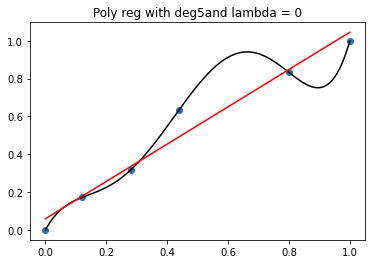

1.0
[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
  41.99939801]


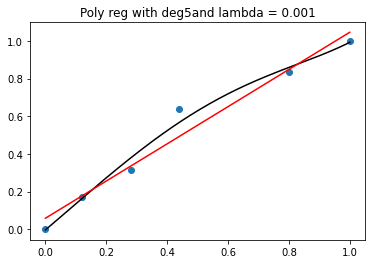

0.9877944050899672
[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]


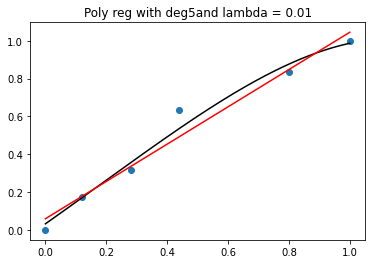

0.9809539612050426
[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]


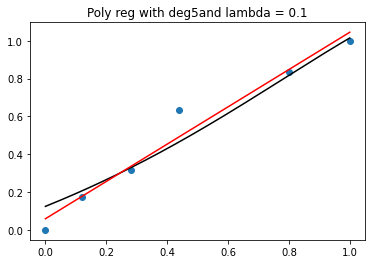

0.9396437428481395
[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]


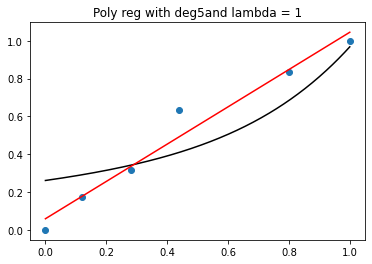

0.7953946450161844
[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]


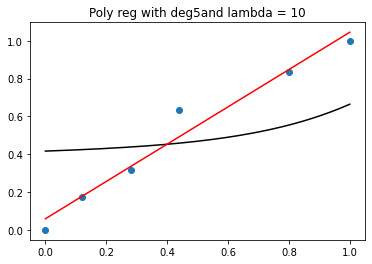

0.3849505189364377
[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]


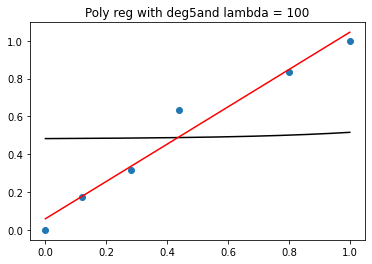

0.05859088028960113
[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]


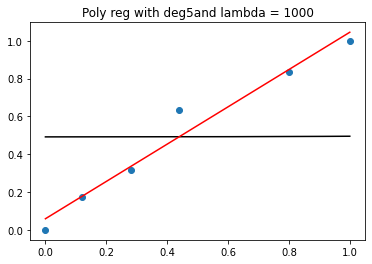

0.006166338591997
[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]


In [33]:
# for each of the lambda we first will generate the 
# polynomial features

for i in lambdas:
    degree = 5 #chosing the 5 since this is the lowest above which gave the fit model
    
    #creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    
    #transfering the input features to polynomial features
    X_poly = ridgecoef.fit_transform(X)
    
    #intialize the ridge regression model with a specific lambda
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_poly,y)
    
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq, ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="black")
    plt.plot(X_seq, reg.predict(X_seq),color='red') # linear regression
    plt.title("Poly reg with deg"+str(degree)+"and lambda = "+str(i))
    plt.show()
    
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print(r2_score(y,y_pred))
    print(ridgereg.coef_)

first we get poly reg with degree 5 and lambda 0 , whihc is overfitting,

moving further , by increasing lambda to 0.001 the wigliness is reduced, and r2 score and beta coeff values are decreased by certain extent.

onincreasing lambda value further r2 and beta coeff values gets reduced further. And for higher values the model becomes underfit.



Hence with increase in lambda, the polynomial regression model becomes progressively simpler as the coefficients are pushed down towards zero

# NOTES and DOUBTS

<h4> 1. Difference between fit(), fit_tranform()?

sklearn basically have transformers which does feature tranformation.
(A) ex: standardscaler (converts feature to mean=0 and variance=1)
and minmaxscaller, PCA, imputer(to handle NaN values). Here we are doing pre-processing on input data to change into some other scaled format. Which again will be used for model training. <br>

(B) In case of Models, we train the model i.e learn from the parameters (these are fine tuned for better accuracy) and the tansformed data will be input to these models. <br> 

<h4>  (A)TRANFORMED DATA(SCALED DATA) => (B)MODEL TRAINING </h4>  <br>

f1,f2,f3 on tranforming -> f1`,f2`,f3`  <br>


when we use .fit(), the function takes f1` and computes μ and  σ , this will be saved as internal object's state.<br>
Then in .tranform() it will apply the computed standardization to the data points.





In [ ]:
reg.fit()